# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Write the problem statement and objectives here

#### Context
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

#### Objective
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Dictionary

The data includes various information related to a food order. A detailed data dictionary is provided below:

*  order_id: A unique identifier for each food order.

*  customer_id: A unique identifier for the customer who placed the order.

*  restaurant_name: The name of the restaurant from which the food was ordered.

*  cuisine_type: The type of cuisine ordered by the customer (e.g., Italian, Mexican, etc.).

*  cost_of_the_order: The total cost of the food order.

*  day_of_the_week: Indicates whether the order was placed on a weekday (Monday to Friday) or a weekend (Saturday and Sunday).

*  rating: The rating given by the customer on a scale of 1 to 5.

*  food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated as the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

*  delivery_time: Time (in minutes) taken by the delivery person to deliver the food. This is calculated as the difference between the timestamps of the delivery person's pick-up confirmation and the drop-off information.

### Let us start by importing the required libraries

In [134]:
# Write your code here to import necessary libraries for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Understanding the structure of the data

In [135]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [136]:
# Write your code here to read the data
foodhub_df = pd.read_csv("foodhub_order.csv")

In [137]:
# Write your code here to view the first 5 rows
foodhub_df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [138]:
# Write your code here
print(f"There are {foodhub_df.shape[0]} rows and {foodhub_df.shape[1]} columns in the dataset.")

There are 1898 rows and 9 columns in the dataset.


#### Observations:
* Number of rows present in the data: 1898
* Number of columns present in the data: 9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [139]:
# Write your code here
foodhub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

| #  | Column                 | Non-Null Count | Datatype   |
|----|------------------------|---------------|-------- |
| 0  | order_id              | 1898 non-null  | int64   |
| 1  | customer_id           | 1898 non-null  | int64   |
| 2  | restaurant_name       | 1898 non-null  | object  |
| 3  | cuisine_type          | 1898 non-null  | object  |
| 4  | cost_of_the_order     | 1898 non-null  | float64 |
| 5  | day_of_the_week       | 1898 non-null  | object  |
| 6  | rating                | 1162 non-null  | object  |
| 7  | food_preparation_time | 1898 non-null  | int64   |
| 8  | delivery_time         | 1898 non-null  | int64   |

The dataframe has one float, four integer, and four object data types. The Rating column has an incorrect data type. Additionally, Order ID and Customer ID are categorical variables represented with numerical labels, which may require adjustment


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [140]:
# Write your code here
#print(foodhub_df.isnull().sum())
rating_list = foodhub_df["rating"]
foodhub_df["rating"] = foodhub_df.groupby("restaurant_name")["rating"].transform(lambda x: x.fillna(x.mean()))
print(foodhub_df.isnull().sum())
foodhub_df["rating"]= foodhub_df["rating"].fillna(0)
print(foodhub_df.isnull().sum())
foodhub_df.to_csv("foodhub_df_bup.csv")

TypeError: Could not convert 4Not given5Not given to numeric

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [141]:
# Write your code here
foodhub_df.describe()
# minimum_prep_time = foodhub_df["food_preparation_time"].min()
# average_prep_time = foodhub_df["food_preparation_time"].mean()
# maximum_prep_time = foodhub_df["food_preparation_time"].max()
# print(minimum_prep_time,average_prep_time, maximum_prep_time)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [142]:
# Write the code here
unrated_orders_count = rating_list.isnull().sum()
print(unrated_orders_count)

0


#### Observations:
* 736 Orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [143]:
foodhub_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


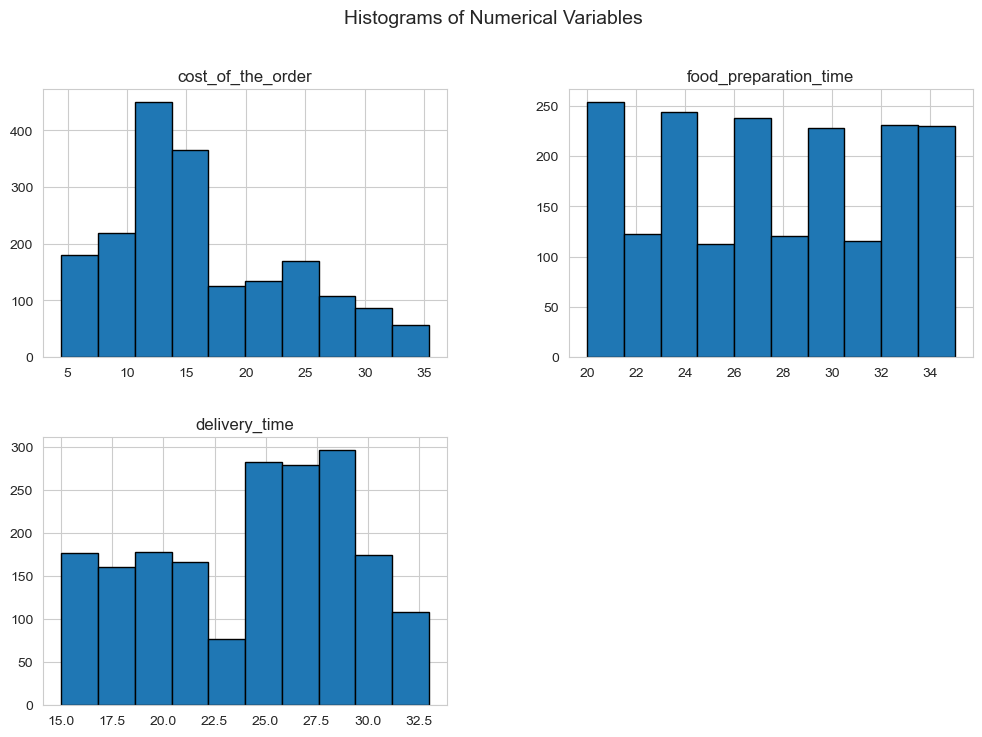

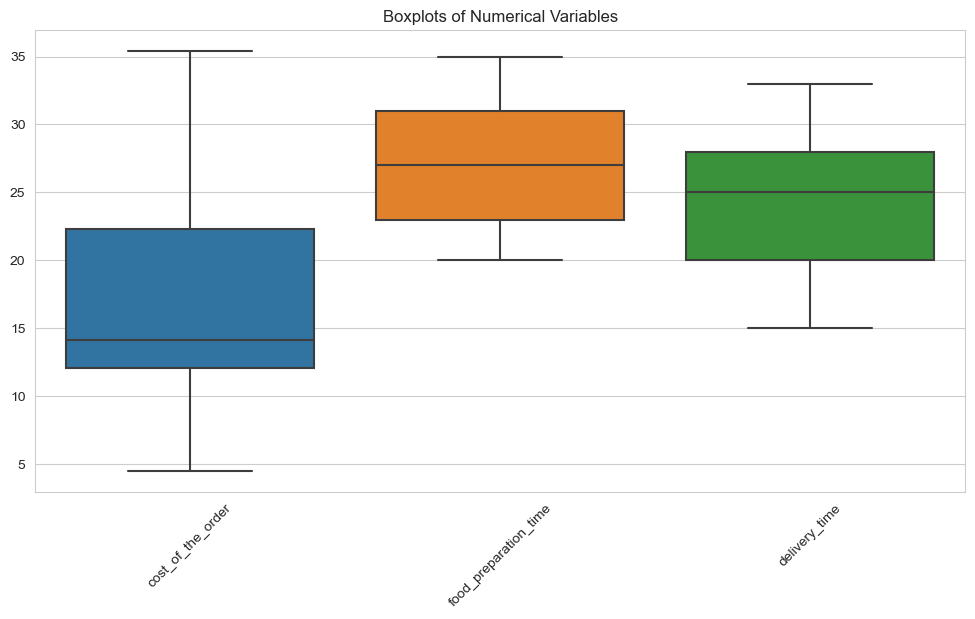

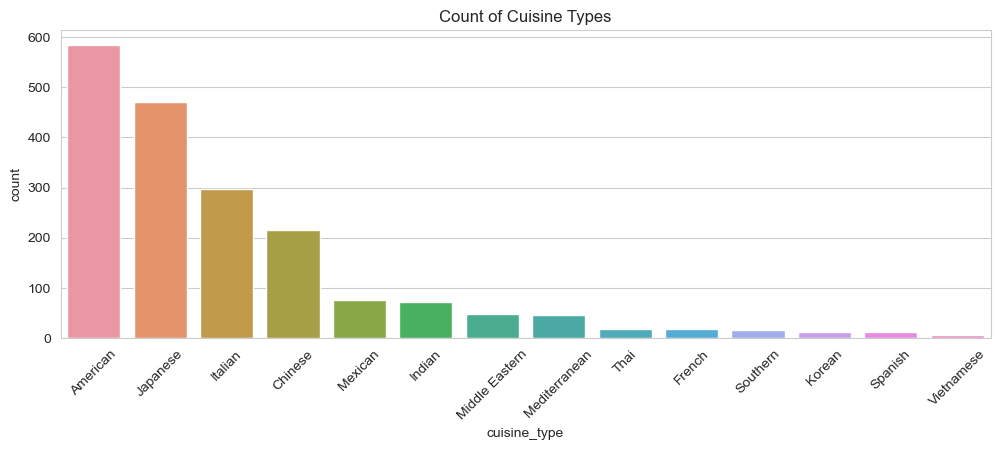

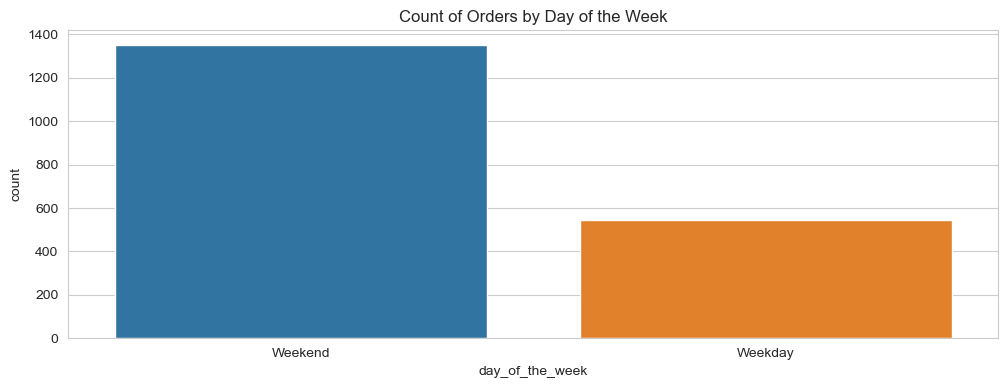

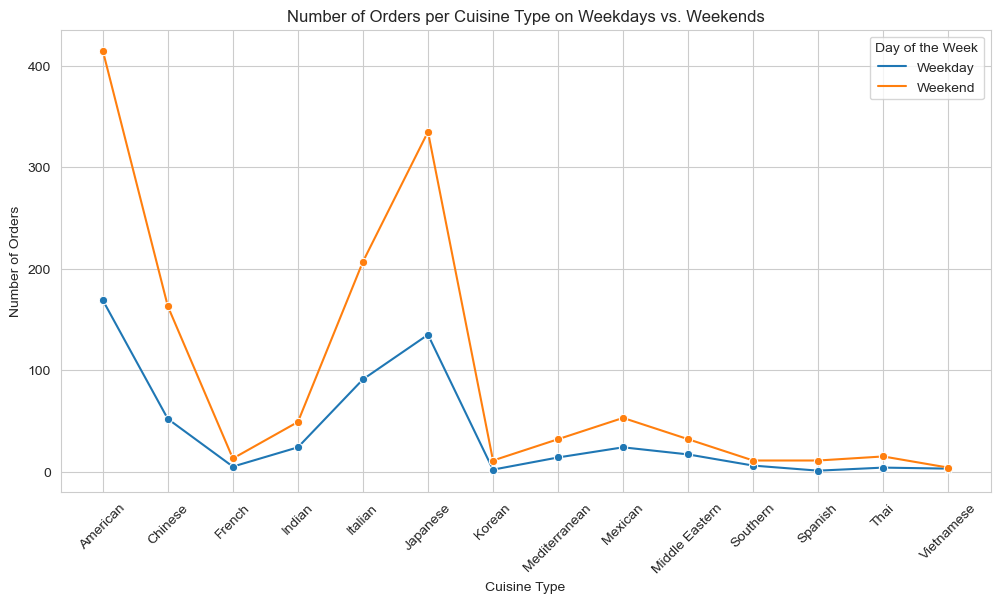

In [144]:
# Write the code here
# Set up the plot style
sns.set_style("whitegrid")

# Plot histograms for numerical variables
foodhub_df[["cost_of_the_order", "food_preparation_time", "delivery_time","rating"]].hist(figsize=(12, 8), bins=10, edgecolor="black")
plt.suptitle("Histograms of Numerical Variables", fontsize=14)
plt.show()

# Boxplots for numerical variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=foodhub_df[["cost_of_the_order", "food_preparation_time", "delivery_time","rating"]])
plt.title("Boxplots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

# Countplot for categorical variables
plt.figure(figsize=(12, 4))
sns.countplot(x="cuisine_type", data=foodhub_df, order=foodhub_df["cuisine_type"].value_counts().index)
plt.title("Count of Cuisine Types")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 4))
sns.countplot(x="day_of_the_week", data=foodhub_df)
plt.title("Count of Orders by Day of the Week")
plt.show()

# Grouping data by cuisine type and day of the week
order_counts = foodhub_df.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='order_count')

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=order_counts, x='cuisine_type', y='order_count', hue='day_of_the_week', marker='o')

# Formatting the plot
plt.xticks(rotation=45)
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Cuisine Type on Weekdays vs. Weekends")
plt.legend(title="Day of the Week")
plt.grid(True)

# Show the plot
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [145]:
# Write the code here
top_restaurants = foodhub_df["restaurant_name"].value_counts().head(5)
print(top_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [146]:
# Write the code here
top_cuisine = foodhub_df[foodhub_df["day_of_the_week"]=="Weekend"]["cuisine_type"].value_counts().head(1)
print(top_cuisine)

American    415
Name: cuisine_type, dtype: int64


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [147]:
# Write the code here

100*sum(foodhub_df["cost_of_the_order"]>20)/len(foodhub_df["cost_of_the_order"])

29.24130663856691

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [148]:
# Write the code here
mean_delivery_time = foodhub_df["delivery_time"].mean()

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [149]:
# Write the code here
foodhub_df.groupby("customer_id")["order_id"].count().reset_index().sort_values(by="order_id", ascending=False).reset_index(drop=True).head(5)

,customer_id,order_id
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,65009,7


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


/var/folders/86/xqs4hy750rd66ntklvm6qgmh0000gn/T/ipykernel_51460/2987001292.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(foodhub_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


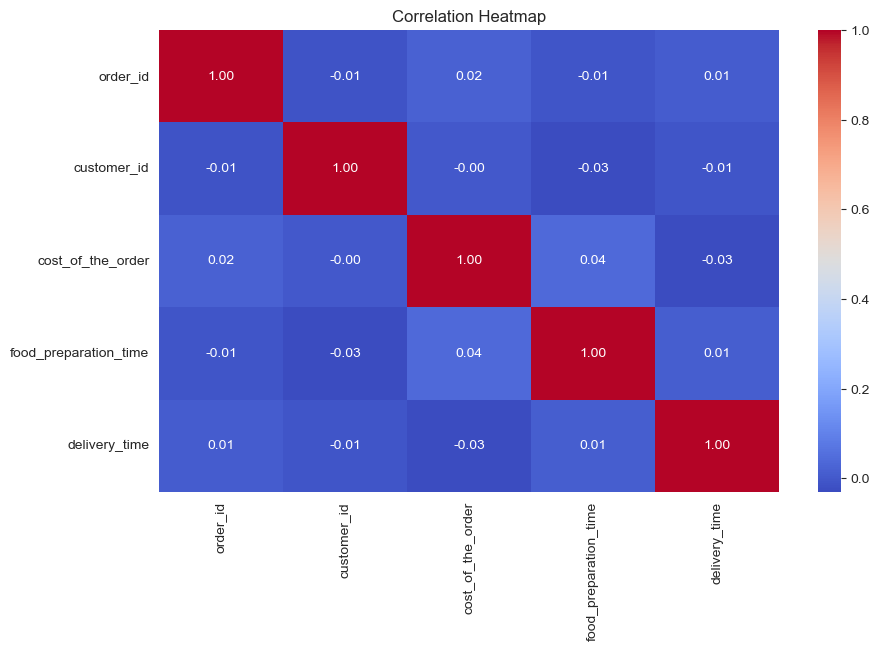

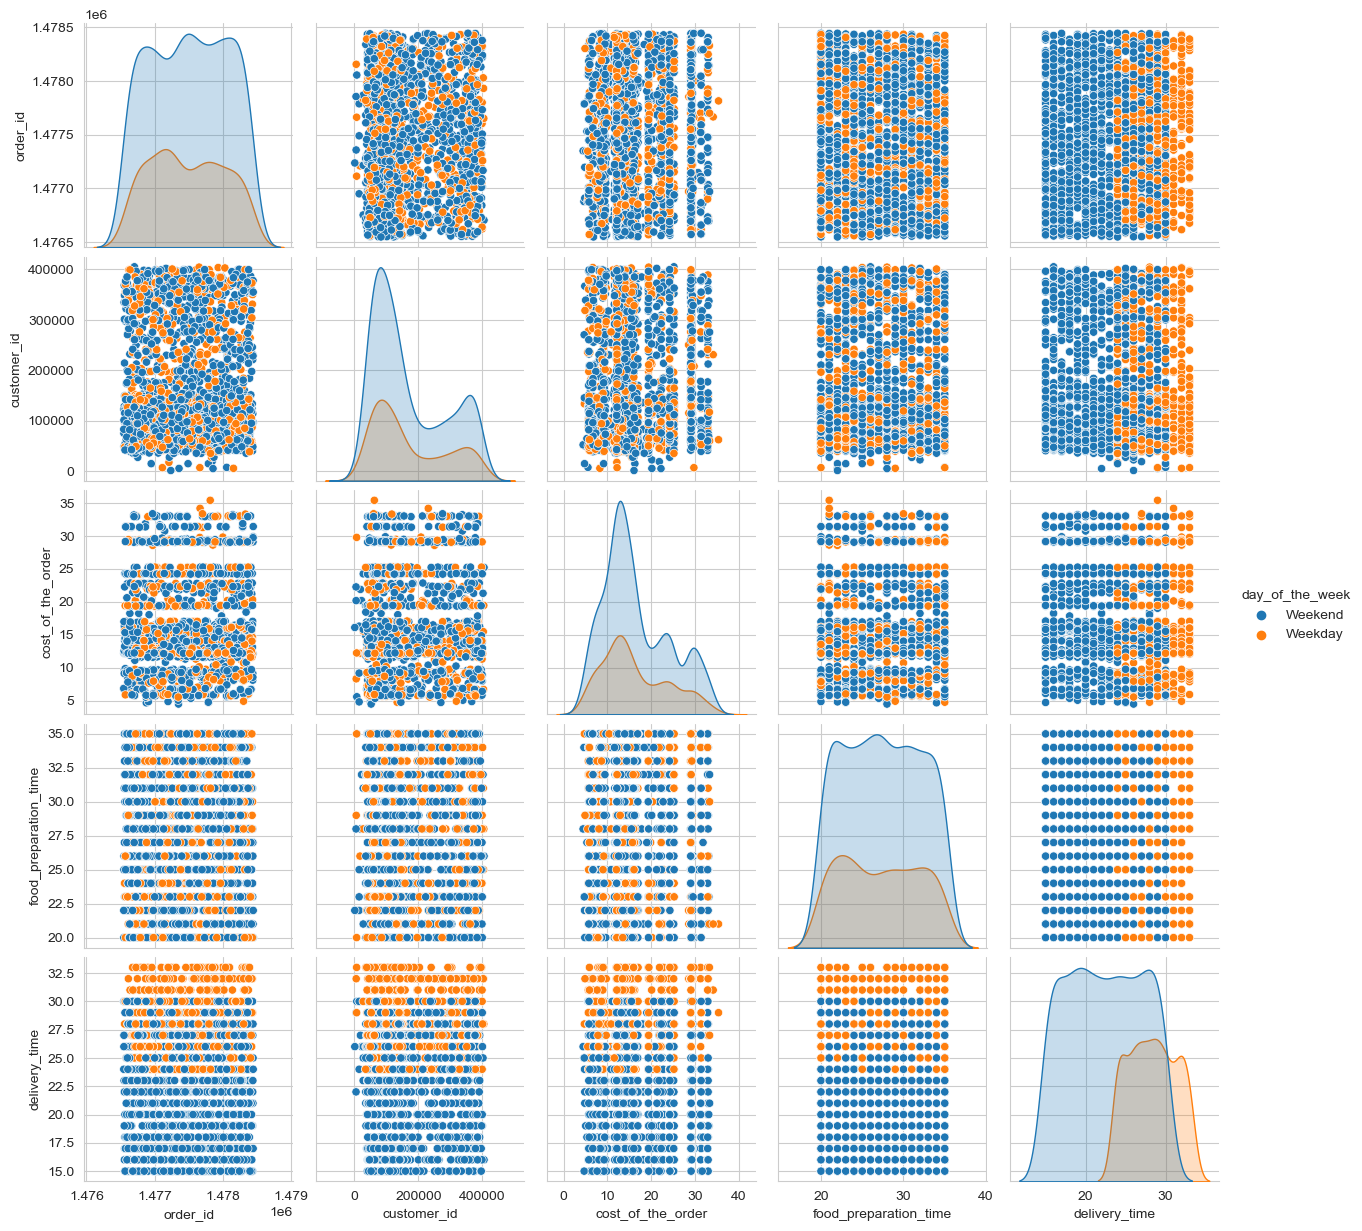

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1200x600 with 0 Axes>

In [150]:
# Write the code here
foodhub_df.head()
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(foodhub_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for Numerical Variables
sns.pairplot(foodhub_df, hue="day_of_the_week")
plt.show()

# Boxplot - Ratings by Cuisine Type
plt.figure(figsize=(12,6))
sns.boxplot(x="cuisine_type", y="rating", data=foodhub_df)
plt.xticks(rotation=90)
plt.title("Distribution of Ratings by Cuisine Type")
plt.show()

# Boxplot - Cost of Order by Day of the Week
plt.figure(figsize=(10,5))
sns.boxplot(x="day_of_the_week", y="cost_of_the_order", data=foodhub_df)
plt.title("Cost of Order by Day of the Week")
plt.show()

# Scatter Plot - Cost vs Delivery Time
plt.figure(figsize=(8,5))
sns.scatterplot(x="cost_of_the_order", y="delivery_time", hue="day_of_the_week", data=foodhub_df)
plt.title("Cost vs. Delivery Time")
plt.show()

# Boxplot: Delivery Time by Cuisine Type
plt.figure(figsize=(12, 6))
sns.boxplot(x="cuisine_type", y="delivery_time", data=foodhub_df)
plt.xticks(rotation=45)
plt.title("Delivery Time Variation by Cuisine Type")
plt.show()

# Countplot: Number of Orders per Cuisine Type by Day
plt.figure(figsize=(12, 6))
sns.countplot(x="cuisine_type", hue="day_of_the_week", data=foodhub_df)
plt.xticks(rotation=45)
plt.title("Number of Orders for Each Cuisine Type by Day of the Week")
plt.show()


# Violin Plot: Ratings per Cuisine Type
plt.figure(figsize=(12, 6))
sns.violinplot(x="cuisine_type", y="rating", data=foodhub_df)
plt.xticks(rotation=45)
plt.title("Distribution of Ratings by Cuisine Type")
plt.show()

# Bar Chart: Top 5 Restaurants by Number of Orders
top_restaurants = foodhub_df['restaurant_name'].value_counts().head(5)
top_restaurants.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Orders")
plt.title("Top 5 Restaurants by Number of Orders")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [151]:
# Write the code here

restaurant_ratings = foodhub_df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)].sort_values(by = "mean", ascending = False).reset_index(drop=True)
eligible_restaurants = eligible_restaurants.rename(columns={
    "count": "Rating_Count",
    "mean": "Average_Rating",
    "restaurant_name": "Restaurant_Name"
})
print(eligible_restaurants)

TypeError: Could not convert 4Not given5Not given to numeric

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [108]:
# Write the code here
total_cost = np.where(foodhub_df['cost_of_the_order'] > 20,foodhub_df['cost_of_the_order']*0.25,
                      np.where((foodhub_df['cost_of_the_order'] > 5) & (foodhub_df['cost_of_the_order'] > 5),0.15*foodhub_df['cost_of_the_order'],0))
Net_Revenue = sum(total_cost)

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [109]:
# Write the code here
# Compute Total Delivery Time
foodhub_df["total_time"] = foodhub_df["food_preparation_time"] + foodhub_df["delivery_time"]

# Count orders with total_time > 60 minutes
orders_above_60 = foodhub_df[foodhub_df["total_time"] > 60].shape[0]

# Calculate percentage
total_orders = foodhub_df.shape[0]
percentage_above_60 = (orders_above_60 / total_orders) * 100

# Print result
print(f"Percentage of orders taking more than 60 minutes: {percentage_above_60:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [110]:
# Write the code here
foodhub_df.groupby("day_of_the_week")["delivery_time"].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The top 5 restaurants receive the highest number of orders, but some have low ratings, indicating potential service or food quality issues.

*  American, Japanese, and Indian cuisines are the most popular, while Chinese and Middle Eastern cuisines show inconsistencies in ratings, possibly due to variable food quality or delivery service.

*  A significant percentage of orders take more than 60 minutes to be delivered, negatively impacting customer satisfaction.

*  Restaurants with shorter delivery times tend to have higher ratings, showing a strong correlation between speed and satisfaction.

*  Many orders have missing or 'Not Given' ratings, making it difficult to fully assess customer feedback.

*  Restaurants with higher ratings and frequent orders are potential candidates for promotional partnerships.

*  The average cost of the order varies significantly across cuisine types, with some expensive restaurants having fewer orders despite good ratings.

*  Weekend orders tend to be higher, suggesting increased demand, which may impact delivery efficiency.

### Recommendations:

*  Focus promotional efforts on highly rated restaurants while helping low-rated but high-order restaurants improve quality and customer service.

*  Optimize delivery logistics for popular cuisines to ensure shorter wait times and work on consistency in food quality for lower-rated cuisines.

*  Partner with faster delivery services and introduce real-time tracking to enhance customer trust and satisfaction.

*  Offer discounts or compensation for excessive delivery delays to retain customer loyalty and improve the restaurant’s reputation.

*  Encourage customers to leave reviews through incentives (discounts, reward points) and improve customer support to enhance feedback collection.

*  Use sentiment analysis on customer reviews to identify common complaints and make data-driven service improvements.

*  Consider dynamic pricing strategies for high-demand weekends to balance order volumes and delivery efficiency.

*  Restaurants with high average order value but low order count should be targeted for special promotions to increase sales.

*  Staffing adjustments or AI-driven demand prediction models can be used to manage peak weekend order demand efficiently.